In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import mineut
from mineut import plot_tools as pt
from mineut import lattice_tools as lt

## Example 1 -- Muon decay at rest.

We should recover the Michel spectrum and a slightly less energetic nu_mubar component.

In [1]:
from mineut import const

In [5]:
1e-9*const.invGeV2_to_cm2*const.c_LIGHT

1.1673299905984207e-26

In [3]:
from mineut.MuC import MuDecaySimulator

design = {
    "name": r"$\mu^+$DAR",
    "short_name": "mudar",
    "Nmu_per_bunch": 1e12,  # 4.9e9 * 4.5e3 * 1.2e7,
    "duty_factor": 1,
    "bunch_multiplicity": 1,
    "finj": 1,
    "muon_polarization": 0.0,

    }

mudar_numu = MuDecaySimulator(design, nuflavor='numu', n_evals=1e5)
mudar_nue = MuDecaySimulator(design, nuflavor='nue', n_evals=1e5)

In [4]:
mudar_numu.decay_muons()
mudar_nue.decay_muons()

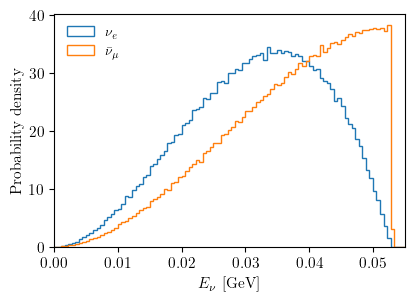

In [5]:
fig, ax = pt.std_fig()
en_bins = np.linspace(0, 0.055, 100)
_=ax.hist(mudar_nue.pnu_restframe['E'], weights=mudar_nue.weights, bins=en_bins, density=True, histtype='step', label=r'$\nu_e$')
_=ax.hist(mudar_numu.pnu_restframe['E'], weights=mudar_numu.weights, bins=en_bins, density=True, histtype='step', label=r'$\bar\nu_\mu$')
ax.set_xlabel(r"$E_\nu$ [GeV]")
ax.set_ylabel("Probability density")
ax.legend()
ax.set_xlim(0, 0.055)
fig.savefig('plots/mudar_nu_spectrum.pdf', bbox_inches='tight')


## Example 2 -- muon storage rings

Now let's place muons in storage rings with a given momentum

In [6]:
design = {
    "name": r"$\nu$STORM",
    "short_name": "nustorm",
    "muon_polarization": 0.0,
    }

nufact_numu = MuDecaySimulator(
    design,
    nuflavor='numu',
    direction="right",
    n_evals=1e6,
    )

nufact_nue = MuDecaySimulator(
    design,
    nuflavor='nue',
    direction="right",
    n_evals=1e6,
    )


In [7]:
nufact_numu.decay_muons()
nufact_nue.decay_muons()

In [8]:
racetrack_lattice = lt.create_racetrack_lattice(
            straight_length=100e2,
            total_length=300e2,
            n_elements=100_000,
            beam_p0=3.8,
            beamdiv=1e-3,
            beamdiv_z=0.1,
            beamsize=1,
        )

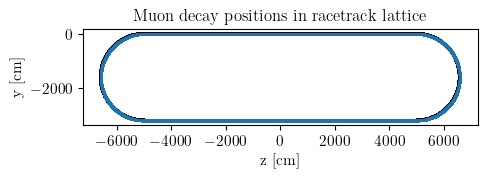

In [9]:
nufact_nue.place_muons_on_lattice(lattice=racetrack_lattice, direction="clockwise")
nufact_numu.place_muons_on_lattice(lattice=racetrack_lattice, direction="clockwise")

fig, ax = pt.std_fig(figsize=(5, 2))
ax.scatter(racetrack_lattice.vertices[0], racetrack_lattice.vertices[1], c='black', marker='+', s=10)
ax.scatter(nufact_numu.pos['z'], nufact_numu.pos['y'], marker='.', s=0.5)
fig.gca().set_aspect('equal', adjustable='box')
ax.set_xlabel("z [cm]")
ax.set_ylabel("y [cm]")
ax.set_title("Muon decay positions in racetrack lattice")
fig.savefig('plots/nufactory_muon_decay_positions.pdf', bbox_inches='tight')

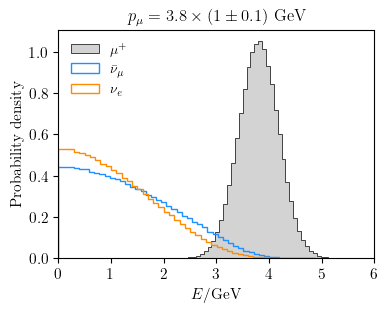

In [10]:
fig, ax = pt.std_fig(figsize=(4,3))
fsize=12
n_bins = 50
ax.hist(nufact_numu.pmu['E'], weights=nufact_numu.weights, bins=n_bins, label=r'$\mu^+$', facecolor='lightgrey', edgecolor='black', lw=0.5, histtype='stepfilled', density=True)
ax.hist(nufact_numu.pnu['E'], weights=nufact_numu.weights, bins=n_bins, label=r'$\bar\nu_\mu$', color='dodgerblue', histtype='step', density=True)
ax.hist(nufact_nue.pnu['E'], weights=nufact_nue.weights, bins=n_bins, label=r'$\nu_e$', color='darkorange', histtype='step', density=True)

ax.legend(frameon=False,loc='upper left')
ax.set_xlim(0,6)
# ax.set_yscale('log')
ax.set_ylabel(r'Probability density')
ax.set_xlabel(r'$E/$GeV')
ax.set_title(r'$p_\mu = 3.8 \times (1 \pm 0.1)$~GeV',fontsize=fsize)

fig.savefig('plots/lattice_test.pdf', dpi=300, bbox_inches='tight')

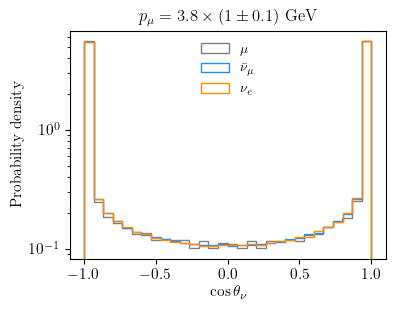

In [11]:
fig, ax = pt.std_fig(figsize=(4,3))
fsize=12
n_bins = 30
ax.hist(nufact_numu.pmu['pz']/nufact_numu.pmu['E'], weights=nufact_numu.weights, bins=n_bins, label=r'$\mu$',color='grey', histtype='step', density=True)
ax.hist(nufact_numu.pnu['pz']/nufact_numu.pnu['E'], weights=nufact_numu.weights, bins=n_bins, label=r'$\bar\nu_\mu$',color='dodgerblue', histtype='step', density=True)
ax.hist(nufact_nue.pnu['pz']/nufact_nue.pnu['E'], weights=nufact_nue.weights, bins=n_bins, label=r'$\nu_e$',color='darkorange', histtype='step', density=True)

ax.legend(frameon=False,loc='upper center')
# ax.set_xlim(0,6)
ax.set_yscale('log')
ax.set_ylabel(r'Probability density')
ax.set_xlabel(r'$\cos{\theta_\nu}$')
ax.set_title(r'$p_\mu = 3.8 \times (1 \pm 0.1)$~GeV',fontsize=fsize)

fig.savefig('plots/3p8GeV_lattice_angle.pdf', dpi=300, bbox_inches='tight')

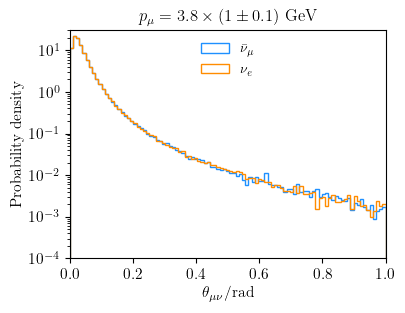

In [12]:
fig, ax = pt.std_fig(figsize=(4,3))
fsize=12
theta_max = 1 # rad
bins = np.linspace(0, theta_max, 100)
ax.hist(nufact_numu.pmu.deltaangle(nufact_numu.pnu), weights=nufact_numu.weights, bins=bins, label=r'$\bar\nu_\mu$',color='dodgerblue', histtype='step', density=True)
ax.hist(nufact_nue.pmu.deltaangle(nufact_nue.pnu), weights=nufact_nue.weights, bins=bins, label=r'$\nu_e$',color='darkorange', histtype='step', density=True)

ax.legend(frameon=False,loc='upper center')
ax.set_ylim(1e-4, 30)
ax.set_xlim(0, theta_max)
ax.set_yscale('log')
ax.set_ylabel(r'Probability density')
ax.set_xlabel(r'$\theta_{\mu\nu}$/rad')
ax.set_title(r'$p_\mu = 3.8 \times (1 \pm 0.1)$~GeV',fontsize=fsize)

fig.savefig('plots/3p8GeV_lattice_opening_angle.pdf', dpi=300, bbox_inches='tight')

In [13]:
enu_edges = np.linspace(0, 5, 40)
enu = (enu_edges[1:] + enu_edges[:-1]) / 2

_, flux_numu = nufact_numu.get_flux_at_generic_location(
        det_location=[0, 0, 100e2],
        det_radius=10e2,
        ebins=enu_edges,
        acceptance=False,
        per_area=False,
        new_polarization=None,
        normalization=1)

_, flux_nue = nufact_nue.get_flux_at_generic_location(
        det_location=[0, 0, 100e2],
        det_radius=10e2,
        ebins=enu_edges,
        acceptance=False,
        per_area=False,
        new_polarization=None,
        normalization=1)

_, flux_numu_far = nufact_numu.get_flux_at_generic_location(
        det_location=[0, 0, 500e2],
        det_radius=10e2,
        ebins=enu_edges,
        acceptance=False,
        per_area=False,
        new_polarization=None,
        normalization=1)

_, flux_nue_far = nufact_nue.get_flux_at_generic_location(
        det_location=[0, 0, 500e2],
        det_radius=10e2,
        ebins=enu_edges,
        acceptance=False,
        per_area=False,
        new_polarization=None,
        normalization=1)

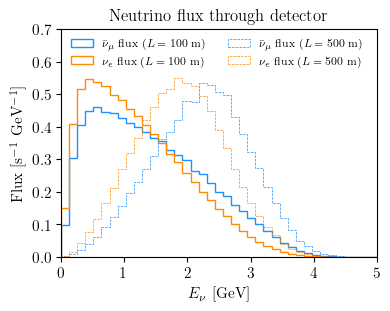

In [14]:
fig, ax = pt.std_fig(figsize=(4,3))
_=ax.hist(enu, bins = enu_edges, weights=flux_numu, label=r'$\bar\nu_\mu$ flux ($L=100$~m)', histtype='step', color='dodgerblue', density=True)
_=ax.hist(enu, bins = enu_edges, weights=flux_nue, label=r'$\nu_e$ flux ($L=100$~m)', histtype='step', color='darkorange', density=True)

_=ax.hist(enu, bins = enu_edges, weights=flux_numu_far, label=r'$\bar\nu_\mu$ flux ($L=500$~m)', histtype='step', color='dodgerblue', density=True, lw=0.5, ls='--')
_=ax.hist(enu, bins = enu_edges, weights=flux_nue_far, label=r'$\nu_e$ flux ($L=500$~m)', histtype='step', color='darkorange', density=True, lw=0.5, ls='--')

ax.set_xlabel(r"$E_\nu$ [GeV]")
ax.set_ylabel(r"Flux [s$^{-1}$ GeV$^{-1}$]")
ax.set_title("Neutrino flux through detector")
ax.legend(loc='upper left', ncol=2, fontsize=8)
ax.set_ylim(0, 0.7)
ax.set_xlim(0, 5)
fig.savefig('plots/nufactory_flux.pdf', bbox_inches='tight')

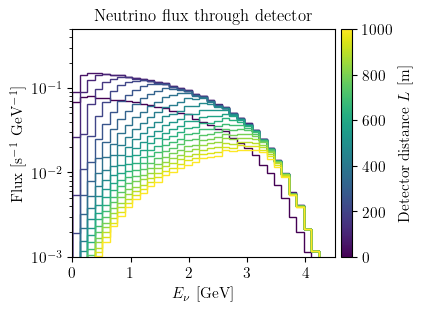

In [15]:
fig, ax = pt.std_fig(figsize=(4,3))
L_vals = np.linspace(0, 1e3, 20) * 1e2
colors = plt.cm.viridis(np.linspace(0, 1, len(L_vals)))
lines = []
for i, L in enumerate(L_vals):
        _, flux_numu = nufact_numu.get_flux_at_generic_location(
                        det_location=[0, 0, L],
                        det_radius=10e2,
                        ebins=enu_edges,
                        acceptance=False,
                        per_area=False,
                        new_polarization=None,
                        normalization=1)

        line = ax.hist(enu, bins=enu_edges, weights=flux_numu, histtype='step', color=colors[i], density=False)[2][0]
        lines.append(line)

sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=L_vals[0]/1e2, vmax=L_vals[-1]/1e2))
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, pad=0.02)
cbar.set_label('Detector distance $L$ [m]')

ax.set_xlabel(r"$E_\nu$ [GeV]")
ax.set_ylabel(r"Flux [s$^{-1}$ GeV$^{-1}$]")
ax.set_title("Neutrino flux through detector")
ax.set_ylim(1e-3, 0.5)
ax.set_xlim(0, 4.5)
ax.set_yscale('log')
fig.savefig('plots/nufactory_flux_numu_w_distance.png', bbox_inches='tight')

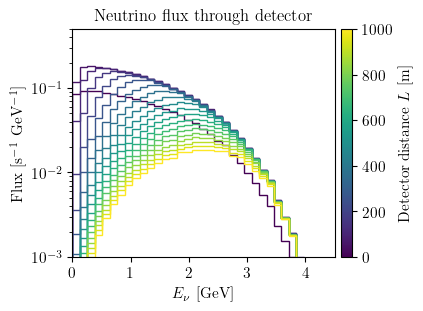

In [16]:
fig, ax = pt.std_fig(figsize=(4,3))
L_vals = np.linspace(0, 1e3, 20) * 1e2
colors = plt.cm.viridis(np.linspace(0, 1, len(L_vals)))
lines = []
for i, L in enumerate(L_vals):
        _, flux_nue = nufact_nue.get_flux_at_generic_location(
                        det_location=[0, 0, L],
                        det_radius=10e2,
                        ebins=enu_edges,
                        acceptance=False,
                        per_area=False,
                        new_polarization=None,
                        normalization=1)
        line = ax.hist(enu, bins=enu_edges, weights=flux_nue, histtype='step', color=colors[i], density=False)[2][0]
        lines.append(line)

sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=L_vals[0]/1e2, vmax=L_vals[-1]/1e2))
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, pad=0.02)
cbar.set_label('Detector distance $L$ [m]')

ax.set_xlabel(r"$E_\nu$ [GeV]")
ax.set_ylabel(r"Flux [s$^{-1}$ GeV$^{-1}$]")
ax.set_title("Neutrino flux through detector")
ax.set_ylim(1e-3, 0.5)
ax.set_xlim(0, 4.5)
ax.set_yscale('log')
fig.savefig('plots/nufactory_flux_nue_w_distance.png', bbox_inches='tight')

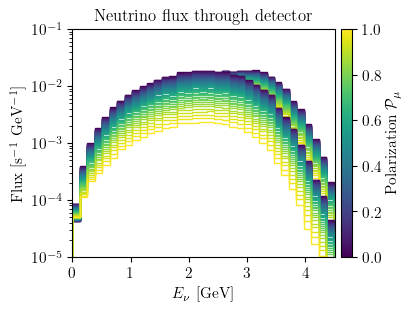

In [17]:
fig, ax = pt.std_fig(figsize=(4,3))
pol_vals = np.linspace(0, 1, 40)
L = 1e3 * 1e2
colors = plt.cm.viridis(np.linspace(0, 1, len(pol_vals)))
lines = []
for i, pol in enumerate(pol_vals):
        _, flux_numu = nufact_numu.get_flux_at_generic_location(
                        det_location=[0, 0, L],
                        det_radius=10e2,
                        ebins=enu_edges,
                        acceptance=False,
                        per_area=False,
                        new_polarization=pol,
                        normalization=1)

        line = ax.hist(enu, bins=enu_edges, weights=flux_numu, histtype='step', color=colors[i], density=False)[2][0]
        lines.append(line)


for i, pol in enumerate(pol_vals):
        _, flux_numu = nufact_nue.get_flux_at_generic_location(
                        det_location=[0, 0, L],
                        det_radius=10e2,
                        ebins=enu_edges,
                        acceptance=False,
                        per_area=False,
                        new_polarization=pol,
                        normalization=1)

        line = ax.hist(enu, bins=enu_edges, weights=flux_numu, histtype='step', color=colors[i], density=False)[2][0]
        lines.append(line)

sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=pol_vals[0], vmax=pol_vals[-1]))
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, pad=0.02)
cbar.set_label('Polarization $\mathcal{P}_\mu$')

ax.set_xlabel(r"$E_\nu$ [GeV]")
ax.set_ylabel(r"Flux [s$^{-1}$ GeV$^{-1}$]")
ax.set_title("Neutrino flux through detector")
ax.set_ylim(1e-5, 0.1)
ax.set_xlim(0, 4.5)
ax.set_yscale('log')
fig.savefig('plots/nufactory_flux_numu_w_polarization.png', bbox_inches='tight')

# Simplified parameterized lattices

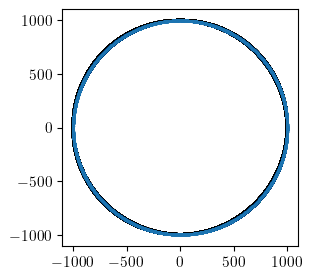

In [18]:
elliptical_lattice = lt.create_elliptical_lattice(
    length_minor=10e2,
    length_major=10e2,
    center=(0, 0),
    n_elements=100_000,
    beam_p0=3.8,
    beamdiv=1e-3,
    beamdiv_z=0.1,
    beamsize=1,
    )

nufact_nue.place_muons_on_lattice(lattice=elliptical_lattice, direction="clockwise")
nufact_numu.place_muons_on_lattice(lattice=elliptical_lattice, direction="clockwise")

plt.scatter(elliptical_lattice.vertices[0], elliptical_lattice.vertices[1], c='black', marker='+', s=10)
plt.scatter(nufact_numu.pos['z'], nufact_numu.pos['y'], marker='.', s=0.2)
plt.gca().set_aspect('equal', adjustable='box')

In [19]:
design = {
    "name": r"MuC Acc",
    "short_name": "muc_acc",
    "muon_polarization": 0.0,
    }

PA_numu = MuDecaySimulator(
    design,
    nuflavor='numu',
    direction="right",
    n_evals=1e5,
    )

PA_nue = MuDecaySimulator(
    design,
    nuflavor='nue',
    direction="right",
    n_evals=1e5,
    )

PA_numu.decay_muons()
PA_nue.decay_muons()

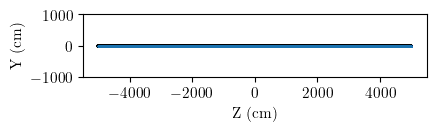

In [20]:
straight_lattice = lt.create_straight_lattice(
            total_length=100e2,
            n_elements=100_000,
            beam_p0=3.8,
            beamdiv=1e-3,
            beamdiv_z=1e-2,
            beamsize=1,
        )

PA_numu.place_muons_on_lattice(lattice=straight_lattice, direction="clockwise")
PA_nue.place_muons_on_lattice(lattice=straight_lattice, direction="clockwise")

plt.scatter(straight_lattice.vertices[0], straight_lattice.vertices[1], c='black', marker='+', s=10)
plt.scatter(PA_numu.pos['z'], PA_numu.pos['y'], marker='.', s=0.1)
plt.ylim(-1000, 1000)
plt.xlabel('Z (cm)')
plt.ylabel('Y (cm)')
plt.gca().set_aspect('equal', adjustable='box')

In [24]:
PA_numu.weights[:,0]

array([7.31845474e-07, 7.41151682e-07, 7.87637854e-07, ...,
       7.96728054e-06, 7.99160514e-06, 7.98343219e-06])

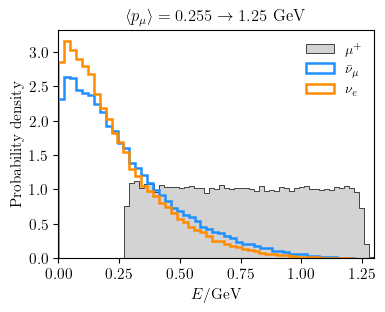

In [22]:
fig, ax = pt.std_fig(figsize=(4,3))
fsize=12
n_bins = 50
ax.hist(PA_numu.pmu['E'], weights=PA_numu.weights[:,0], bins=n_bins, label=r'$\mu^+$', facecolor='lightgrey', edgecolor='black', lw=0.5, histtype='stepfilled', density=True)
ax.hist(PA_numu.pnu['E'], weights=PA_numu.weights[:,0], lw=1.8, bins=n_bins, label=r'$\bar\nu_\mu$', color='dodgerblue', histtype='step', density=True)
ax.hist(PA_nue.pnu['E'], weights=PA_nue.weights[:,0], lw=1.8, bins=n_bins, label=r'$\nu_e$', color='darkorange', histtype='step', density=True)

ax.legend(frameon=False,loc='upper right')
ax.set_xlim(0,1.3)
# ax.set_yscale('log')
ax.set_ylabel(r'Probability density')
ax.set_xlabel(r'$E/$GeV')
ax.set_title(r'$\langle p_\mu \rangle =0.255 \to 1.25$~GeV',fontsize=fsize)

fig.savefig('plots/PA_energy_spectrum.pdf', dpi=300, bbox_inches='tight')

Text(0.5, 1.0, 'Neutrino energy spectrum\nTime: 0.0 - 17.6 ns')

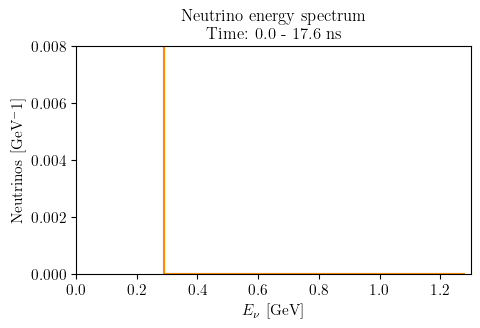

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
# import pt  # assuming pt.std_fig is your custom figure utility

# Bin times and energies
time_bins = np.linspace(PA_numu.mutimes.min(), PA_numu.mutimes.max(), 20)
dt = time_bins[1] - time_bins[0]
enu_edges = np.linspace(0, 1.3, 30)
enu = (enu_edges[1:] + enu_edges[:-1]) / 2



# Set up figure
fig, ax = pt.std_fig(figsize=(5, 3))  # or use plt.subplots()
line0, = ax.step([], [], color='grey')
line1, = ax.step([], [], color='dodgerblue')
line2, = ax.step([], [], color='darkorange')
ax.set_xlim(enu_edges[0], enu_edges[-1])
ax.set_ylim(0, 0.008)
ax.set_xlabel(r'$E_{\nu}$ [GeV]')
ax.set_ylabel('Neutrinos [GeV$^-1$]')
ax.set_title('Neutrino energy spectrum vs time')


line0.set_data([], [])
line1.set_data([], [])
line2.set_data([], [])


# Get the time window
i=0
t_min, t_max = time_bins[i], time_bins[i + 1]

# Create mask for valid events in this time bin
mask_numu = (PA_numu.mutimes >= t_min) & (PA_numu.mutimes < t_max)
mask_nue = (PA_nue.mutimes >= t_min) & (PA_nue.mutimes < t_max)

flux_numu, _ = np.histogram(
            PA_numu.pnu['E'][mask_numu],
            weights=PA_numu.weights[mask_numu,0],
            density=True,
            bins=enu_edges)

flux_nue, _ = np.histogram(
            PA_nue.pnu['E'][mask_nue],
            weights=PA_nue.weights[mask_nue,0],
            density=True,
            bins=enu_edges)

# hist_mu, _ = np.histogram(PA_numu.pmu['E'][mask_numu], bins=enu_edges, weights=PA_numu.weights[mask_numu,0], density=True)
# line0.set_data(enu, hist_mu/np.max(hist_mu) * 0.005)
line1.set_data(enu, flux_numu)
line2.set_data(enu, flux_nue)
ax.set_title(f'Neutrino energy spectrum\nTime: {t_min*1e9:.1f} - {t_max*1e9:.1f} ns')


/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_28736/300026796.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


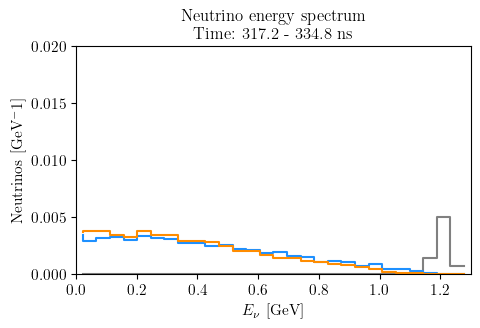

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
# import pt  # assuming pt.std_fig is your custom figure utility

# Bin times and energies
time_bins = np.linspace(PA_numu.mutimes.min(), PA_numu.mutimes.max(), 20)
dt = time_bins[1] - time_bins[0]
enu_edges = np.linspace(0, 1.3, 30)
enu = (enu_edges[1:] + enu_edges[:-1]) / 2



# Set up figure
fig, ax = pt.std_fig(figsize=(5, 3))  # or use plt.subplots()
line0, = ax.step([], [], color='grey')
line1, = ax.step([], [], color='dodgerblue')
line2, = ax.step([], [], color='darkorange')
ax.set_xlim(enu_edges[0], enu_edges[-1])
ax.set_ylim(0, 0.02)
ax.set_xlabel(r'$E_{\nu}$ [GeV]')
ax.set_ylabel('Neutrinos [GeV$^-1$]')
ax.set_title('Neutrino energy spectrum vs time')

def init():
    line0.set_data([], [])
    line1.set_data([], [])
    line2.set_data([], [])
    return line0, line1, line2

def animate(i):
    # Get the time window
    t_min, t_max = time_bins[i], time_bins[i + 1]
    
    # Create mask for valid events in this time bin
    mask_numu = (PA_numu.mutimes >= t_min) & (PA_numu.mutimes < t_max)
    mask_nue = (PA_nue.mutimes >= t_min) & (PA_nue.mutimes < t_max)

    flux_numu, _ = np.histogram(
                PA_numu.pnu['E'][mask_numu],
                weights=PA_numu.weights[mask_numu,0],
                density=False,
                bins=enu_edges)

    flux_nue, _ = np.histogram(
                PA_nue.pnu['E'][mask_nue],
                weights=PA_nue.weights[mask_nue,0],
                density=False,
                bins=enu_edges)
    
    hist_mu, _ = np.histogram(PA_numu.pmu['E'][mask_numu], bins=enu_edges, weights=PA_numu.weights[mask_numu,0], density=True)
    line0.set_data(enu, hist_mu/np.max(hist_mu) * 0.005)
    line1.set_data(enu, flux_numu)
    line2.set_data(enu, flux_nue)
    ax.set_title(f'Neutrino energy spectrum\nTime: {t_min*1e9:.1f} - {t_max*1e9:.1f} ns')
    return line0, line1, line2,

ani = FuncAnimation(fig, animate, frames=len(time_bins)-1, init_func=init, blit=True, interval=200)
fig.tight_layout()
ani.save('plots/numu_energy_vs_time_allnus.gif', writer='pillow', fps=10)
plt.show()

/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_28736/2737022243.py:66: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


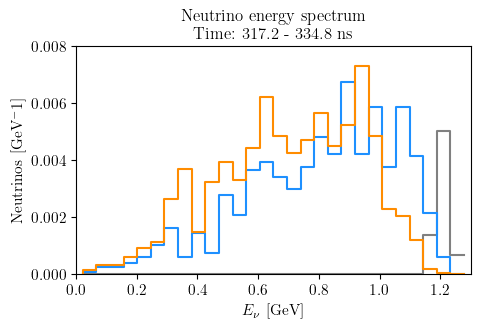

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
# import pt  # assuming pt.std_fig is your custom figure utility

# Bin times and energies
time_bins = np.linspace(PA_numu.mutimes.min(), PA_numu.mutimes.max(), 20)
dt = time_bins[1] - time_bins[0]
enu_edges = np.linspace(0, 1.3, 30)
enu = (enu_edges[1:] + enu_edges[:-1]) / 2



# Set up figure
fig, ax = pt.std_fig(figsize=(5, 3))  # or use plt.subplots()
line0, = ax.step([], [], color='grey')
line1, = ax.step([], [], color='dodgerblue')
line2, = ax.step([], [], color='darkorange')
ax.set_xlim(enu_edges[0], enu_edges[-1])
ax.set_ylim(0, 0.008)
ax.set_xlabel(r'$E_{\nu}$ [GeV]')
ax.set_ylabel('Neutrinos [GeV$^-1$]')
ax.set_title('Neutrino energy spectrum vs time')

def init():
    line0.set_data([], [])
    line1.set_data([], [])
    line2.set_data([], [])
    return line0, line1, line2

def animate(i):
    # Get the time window
    t_min, t_max = time_bins[i], time_bins[i + 1]
    
    # Create mask for valid events in this time bin
    mask_numu = (PA_numu.mutimes >= t_min) & (PA_numu.mutimes < t_max)
    mask_nue = (PA_nue.mutimes >= t_min) & (PA_nue.mutimes < t_max)

    _, flux_numu = PA_numu.get_flux_at_generic_location(
                det_location=[0, 0, 500e2],
                det_radius=10e2,
                ebins=enu_edges,
                acceptance=False,
                per_area=False,
                new_polarization=None,
                normalization=1,
                mask=mask_numu)

    _, flux_nue = PA_nue.get_flux_at_generic_location(
                det_location=[0, 0, 500e2],
                det_radius=10e2,
                ebins=enu_edges,
                acceptance=False,
                per_area=False,
                new_polarization=None,
                normalization=1,
                mask=mask_nue)
    hist_mu, _ = np.histogram(PA_numu.pmu['E'][mask_numu], bins=enu_edges, weights=PA_numu.weights[mask_numu,0], density=True)
    line0.set_data(enu, hist_mu/np.max(hist_mu) * 0.005)
    line1.set_data(enu, flux_numu)
    line2.set_data(enu, flux_nue)
    ax.set_title(f'Neutrino energy spectrum\nTime: {t_min*1e9:.1f} - {t_max*1e9:.1f} ns')
    return line0, line1, line2,

ani = FuncAnimation(fig, animate, frames=len(time_bins)-1, init_func=init, blit=True, interval=200)
fig.tight_layout()
ani.save('plots/numu_energy_vs_time.gif', writer='pillow', fps=10)
plt.show()

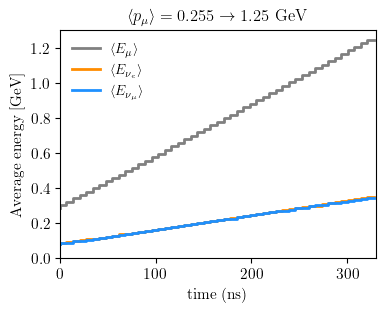

In [41]:
# Bin mutimes and compute average neutrino energy in each bin
bins = np.linspace(PA_numu.mutimes.min(), PA_numu.mutimes.max(), 50)
digitized = np.digitize(PA_numu.mutimes, bins)
avg_mu_E = [PA_numu.pmu['E'][digitized == i].mean() if np.any(digitized == i) else np.nan for i in range(1, len(bins))]
avg_numu_E = [np.mean(PA_numu.pnu['E'][digitized == i]) if np.any(digitized == i) else np.nan for i in range(1, len(bins))]
bins = np.linspace(PA_nue.mutimes.min(), PA_nue.mutimes.max(), 50)
digitized = np.digitize(PA_nue.mutimes, bins)
avg_nue_E = [np.mean(PA_nue.pnu['E'][digitized == i]) if np.any(digitized == i) else np.nan for i in range(1, len(bins))]

fig, ax = pt.std_fig(figsize=(4,3))
ax.step(bins[:-1]*1e9, avg_mu_E, lw=2, linestyle='-', color='grey', label=r'$\langle E_{\mu} \rangle$')
ax.step(bins[:-1]*1e9, avg_nue_E, lw=2, linestyle='-', color='darkorange', label=r'$\langle E_{\nu_e} \rangle$')
ax.step(bins[:-1]*1e9, avg_numu_E, lw=2, linestyle='-', color='dodgerblue', label=r'$\langle E_{\nu_\mu} \rangle$')
ax.set_xlabel('time (ns)')
ax.set_ylabel(r'Average energy [GeV]')
ax.set_title(r'$\langle p_\mu \rangle =0.255 \to 1.25$~GeV', fontsize=fsize)
ax.legend(frameon=False, loc='upper left')
ax.set_ylim(0,1.3)
ax.set_xlim(0,330)
fig.savefig('plots/PA_avg_nuE_vs_mutimes.pdf', dpi=300, bbox_inches='tight')


In [52]:
design = {
    "name": r"RLA1",
    "short_name": "rla1",
    "muon_polarization": 0.0,
    }

RLA1_numu = MuDecaySimulator(
    design,
    nuflavor='numu',
    direction="right",
    n_evals=1e6,
    )

RLA1_nue = MuDecaySimulator(
    design,
    nuflavor='nue',
    direction="right",
    n_evals=1e6,
    )

RLA1_numu.decay_muons()
RLA1_nue.decay_muons()


Text(0.5, 1.0, 'RLA 1')

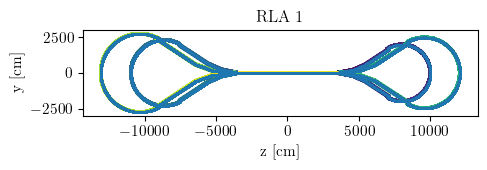

In [53]:
RLA1_lattice = lt.create_RLA_lattice(
            straight_length=70e2,
            n_elements=100_000,
            p0_injection=1.25,
            dp_dx_LA=0.75/70e2,
            beamdiv=1e-3,
            beamdiv_z=1e-2,
            beamsize=1e-2,
        )
RLA1_nue.place_muons_on_lattice(lattice=RLA1_lattice, direction="clockwise")
RLA1_numu.place_muons_on_lattice(lattice=RLA1_lattice, direction="clockwise")

max_index = len(RLA1_lattice.vertices[1])

fig, ax = pt.std_fig(figsize=(5, 2))
ax.scatter(RLA1_lattice.vertices[0], RLA1_lattice.vertices[1], c=np.linspace(0,1,max_index), marker='+', s=10)
#ax.scatter(RLA_lattice.vertices[0], RLA_lattice.vertices[1], c='black')
ax.scatter(RLA1_numu.pos['z'], RLA1_numu.pos['y'], marker='.', s=0.25)

fig.gca().set_aspect('equal', adjustable='box')

ax.set_xlabel("z [cm]")
ax.set_ylabel("y [cm]")
ax.set_title("RLA 1")

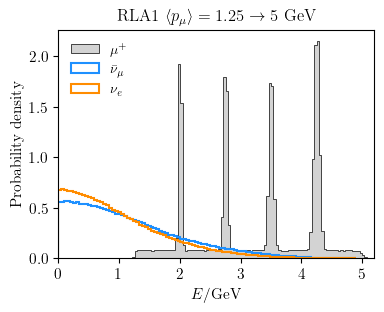

In [54]:
fig, ax = pt.std_fig(figsize=(4,3))
fsize=12
n_bins = 100
ax.hist(RLA1_numu.pmu['E'], weights=RLA1_numu.weights[:,0], bins=n_bins,  label=r'$\mu^+$', facecolor='lightgrey', edgecolor='black', lw=0.5, histtype='stepfilled', density=True)
ax.hist(RLA1_numu.pnu['E'], weights=RLA1_numu.weights[:,0], bins=n_bins, lw=1.5, label=r'$\bar\nu_\mu$', color='dodgerblue', histtype='step', density=True)
ax.hist(RLA1_nue.pnu['E'], weights=RLA1_nue.weights[:,0], bins=n_bins, lw=1.5, label=r'$\nu_e$', color='darkorange', histtype='step', density=True)

ax.legend(frameon=False,loc='upper left')
ax.set_xlim(0,5.2)
# ax.set_yscale('log')
ax.set_ylabel(r'Probability density')
ax.set_xlabel(r'$E/$GeV')
ax.set_title(r'RLA1 $\langle p_\mu \rangle = 1.25 \to 5$~GeV',fontsize=fsize)

fig.savefig('plots/RLA1_energy_spectrum.pdf', dpi=300, bbox_inches='tight')

In [51]:
design = {
    "name": r"RLA2",
    "short_name": "rla2",
    "muon_polarization": 0.0,
    }

RLA2_numu = MuDecaySimulator(
    design,
    nuflavor='numu',
    direction="right",
    n_evals=1e6,
    )

RLA2_nue = MuDecaySimulator(
    design,
    nuflavor='nue',
    direction="right",
    n_evals=1e6,
    )

RLA2_numu.decay_muons()
RLA2_nue.decay_muons()


Text(0.5, 1.0, 'RLA 2')

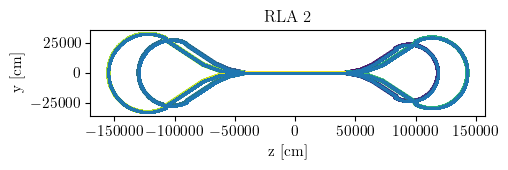

In [55]:
RLA2_lattice = lt.create_RLA_lattice(
            straight_length=829e2,
            n_elements=100_000,
            p0_injection=5.0,
            dp_dx_LA=11.6/829e2,
            beamdiv=1e-3,
            beamdiv_z=1e-2,
            beamsize=1e-2,
        )
RLA2_nue.place_muons_on_lattice(lattice=RLA2_lattice, direction="clockwise")
RLA2_numu.place_muons_on_lattice(lattice=RLA2_lattice, direction="clockwise")

max_index = len(RLA2_lattice.vertices[1])

fig, ax = pt.std_fig(figsize=(5, 2))
ax.scatter(RLA2_lattice.vertices[0], RLA2_lattice.vertices[1], c=np.linspace(0, 1, max_index), marker='+', s=10)
#ax.scatter(RLA_lattice.vertices[0], RLA_lattice.vertices[1], c='black')
ax.scatter(RLA2_numu.pos['z'], RLA2_numu.pos['y'], marker='.', s=0.25)

fig.gca().set_aspect('equal', adjustable='box')

ax.set_xlabel("z [cm]")
ax.set_ylabel("y [cm]")
ax.set_title("RLA 2")

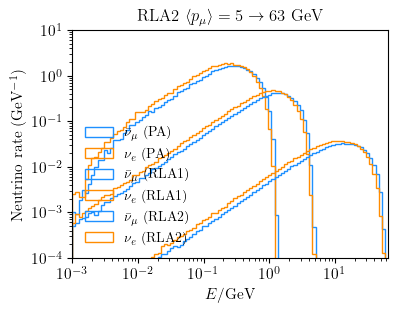

In [56]:
# Use geometrically spaced energy bins
energy_min = 1e-3  # avoid zero for logspace
energy_max = 65
n_bins = 100
energy_bins = np.geomspace(energy_min, energy_max, n_bins + 1)

fig, ax = pt.std_fig(figsize=(4,3))
fsize = 12

ax.hist(PA_numu.pnu['E'], weights=PA_numu.weights[:,0]*PA_numu.pnu['E'], bins=energy_bins, label=r'$\bar\nu_\mu$ (PA)', color='dodgerblue', histtype='step', density=True)
ax.hist(PA_nue.pnu['E'], weights=PA_nue.weights[:,0]*PA_nue.pnu['E'], bins=energy_bins, label=r'$\nu_e$ (PA)', color='darkorange', histtype='step', density=True)

ax.hist(RLA1_numu.pnu['E'], weights=RLA1_numu.weights[:,0]*RLA1_numu.pnu['E'], bins=energy_bins, label=r'$\bar\nu_\mu$ (RLA1)', color='dodgerblue', histtype='step', density=True)
ax.hist(RLA1_nue.pnu['E'], weights=RLA1_nue.weights[:,0]*RLA1_nue.pnu['E'], bins=energy_bins, label=r'$\nu_e$ (RLA1)', color='darkorange', histtype='step', density=True)

ax.hist(RLA2_numu.pnu['E'], weights=RLA2_numu.weights[:,0]*RLA2_numu.pnu['E'], bins=energy_bins, label=r'$\bar\nu_\mu$ (RLA2)', color='dodgerblue', histtype='step', density=True)
ax.hist(RLA2_nue.pnu['E'], weights=RLA2_nue.weights[:,0]*RLA2_nue.pnu['E'], bins=energy_bins, label=r'$\nu_e$ (RLA2)', color='darkorange', histtype='step', density=True)

ax.legend(frameon=False, loc='lower left')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(energy_min, energy_max)
ax.set_ylim(1e-4, 1e1)
ax.set_ylabel(r'Neutrino rate (GeV$^{-1}$)')
ax.set_xlabel(r'$E/$GeV')
ax.set_title(r'RLA2 $\langle p_\mu \rangle = 5 \to 63$~GeV', fontsize=fsize)

fig.savefig('plots/RLA2_energy_spectrum_logE.pdf', dpi=300, bbox_inches='tight')

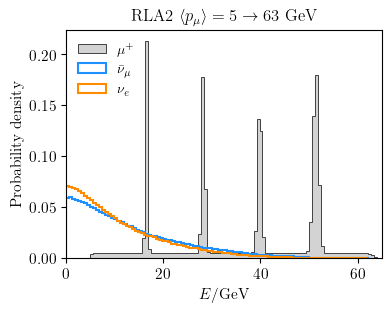

In [57]:
fig, ax = pt.std_fig(figsize=(4,3))
fsize=12
n_bins = 100
ax.hist(RLA2_numu.pmu['E'], weights=RLA2_numu.weights[:,0], bins=n_bins, label=r'$\mu^+$', facecolor='lightgrey', edgecolor='black', lw=0.5, histtype='stepfilled', density=True)
ax.hist(RLA2_numu.pnu['E'], weights=RLA2_numu.weights[:,0], lw=1.5, bins=n_bins, label=r'$\bar\nu_\mu$', color='dodgerblue', histtype='step', density=True)
ax.hist(RLA2_nue.pnu['E'], weights=RLA2_nue.weights[:,0], lw=1.5, bins=n_bins, label=r'$\nu_e$', color='darkorange', histtype='step', density=True)

ax.legend(frameon=False,loc='upper left')
ax.set_xlim(0,65)
# ax.set_yscale('log')
ax.set_ylabel(r'Probability density')
ax.set_xlabel(r'$E/$GeV')
ax.set_title(r'RLA2 $\langle p_\mu \rangle = 5 \to 63$~GeV',fontsize=fsize)

fig.savefig('plots/RLA2_energy_spectrum.pdf', dpi=300, bbox_inches='tight')

/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_28736/24365821.py:62: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


No flux through detector.
No flux through detector.
No flux through detector.
No flux through detector.
No flux through detector.
No flux through detector.
No flux through detector.
No flux through detector.
No flux through detector.
No flux through detector.
No flux through detector.
No flux through detector.
No flux through detector.
No flux through detector.
No flux through detector.
No flux through detector.
No flux through detector.
No flux through detector.
No flux through detector.
No flux through detector.
No flux through detector.
No flux through detector.
No flux through detector.
No flux through detector.
No flux through detector.
No flux through detector.
No flux through detector.
No flux through detector.
No flux through detector.
No flux through detector.
No flux through detector.
No flux through detector.
No flux through detector.
No flux through detector.
No flux through detector.
No flux through detector.
No flux through detector.
No flux through detector.
No flux thro

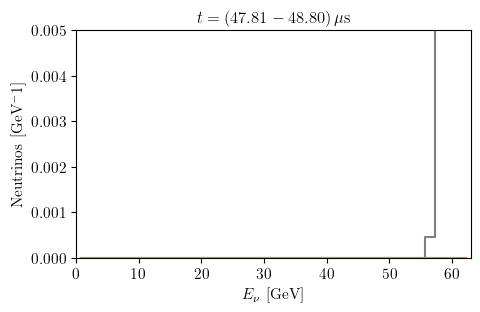

In [66]:
def make_animation_over_time(MuC_acc_numu, MuC_acc_nue, name='test',Emax=6):

    # Bin times and energies
    time_bins = np.linspace(MuC_acc_numu.mutimes.min(), MuC_acc_numu.mutimes.max(), 50)
    dt = time_bins[1] - time_bins[0]
    enu_edges = np.linspace(0, Emax, 40)
    enu = (enu_edges[1:] + enu_edges[:-1]) / 2

    # Set up figure
    fig, ax = pt.std_fig(figsize=(5, 3))  # or use plt.subplots()
    line0, = ax.step([], [], color='grey')
    line1, = ax.step([], [], color='dodgerblue')
    line2, = ax.step([], [], color='darkorange')
    ax.set_xlim(enu_edges[0], enu_edges[-1])
    ax.set_ylim(0, 0.005)
    ax.set_xlabel(r'$E_{\nu}$ [GeV]')
    ax.set_ylabel('Neutrinos [GeV$^-1$]')
    ax.set_title('Neutrino energy spectrum vs time')

    def init():
        line0.set_data([], [])
        line1.set_data([], [])
        line2.set_data([], [])
        return line0, line1, line2

    def animate(i):
        # Get the time window
        t_min, t_max = time_bins[i], time_bins[i + 1]
        
        # Create mask for valid events in this time bin
        mask_numu = (MuC_acc_numu.mutimes >= t_min) & (MuC_acc_numu.mutimes < t_max)
        mask_nue = (MuC_acc_nue.mutimes >= t_min) & (MuC_acc_nue.mutimes < t_max)

        _, flux_numu = MuC_acc_numu.get_flux_at_generic_location(
                    det_location=[0, 0, 5e5],
                    det_radius=1e5,
                    ebins=enu_edges,
                    acceptance=False,
                    per_area=False,
                    new_polarization=None,
                    normalization=1,
                    mask=mask_numu)
        
        _, flux_nue = MuC_acc_nue.get_flux_at_generic_location(
                    det_location=[0, 0, 5e5],
                    det_radius=1e5,
                    ebins=enu_edges,
                    acceptance=False,
                    per_area=False,
                    new_polarization=None,
                    normalization=1,
                    mask=mask_nue)
        
        hist_mu, _ = np.histogram(MuC_acc_numu.pmu['E'][mask_numu], bins=enu_edges, weights=MuC_acc_numu.weights[mask_numu,0], density=False)
        line0.set_data(enu, hist_mu/np.max(hist_mu) * 0.02)
        line1.set_data(enu, flux_numu)
        line2.set_data(enu, flux_nue)
        ax.set_title(rf'$t = ({t_min*1e6:.2f} - {t_max*1e6:.2f}) \,\mu$s')
        return line0, line1, line2,

    ani = FuncAnimation(fig, animate, frames=len(time_bins)-1, init_func=init, blit=True, interval=200)
    fig.tight_layout()
    ani.save(f'plots/numu_energy_vs_time_{name}.gif', writer='pillow', fps=20)
    plt.show()
# make_animation_over_time(RLA1_numu, RLA1_nue, name='RLA1', Emax=5.0)
make_animation_over_time(RLA2_numu, RLA2_nue, name='RLA2', Emax=63)

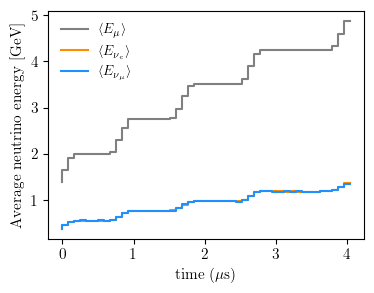

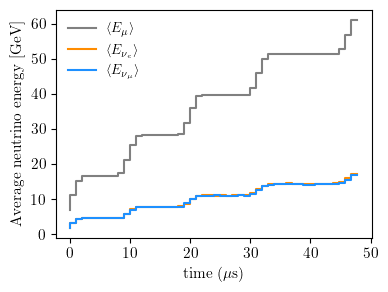

In [72]:
def plot_avgE_vs_time(MuC_acc_numu, MuC_acc_nue):
    # Bin mutimes and compute average neutrino energy in each bin
    bins = np.linspace(MuC_acc_numu.mutimes.min(), MuC_acc_numu.mutimes.max(), 50)
    digitized = np.digitize(MuC_acc_numu.mutimes, bins)
    avg_mu_E = [MuC_acc_numu.pmu['E'][digitized == i].mean() if np.any(digitized == i) else np.nan for i in range(1, len(bins))]
    avg_numu_E = [MuC_acc_numu.pnu['E'][digitized == i].mean() if np.any(digitized == i) else np.nan for i in range(1, len(bins))]
    bins = np.linspace(MuC_acc_nue.mutimes.min(), MuC_acc_nue.mutimes.max(), 50)
    digitized = np.digitize(MuC_acc_nue.mutimes, bins)
    avg_nue_E = [MuC_acc_nue.pnu['E'][digitized == i].mean() if np.any(digitized == i) else np.nan for i in range(1, len(bins))]

    fig, ax = pt.std_fig(figsize=(4,3))
    ax.step(1e6*bins[:-1], avg_mu_E, linestyle='-', color='grey', label=r'$\langle E_{\mu} \rangle$')
    ax.step(1e6*bins[:-1], avg_nue_E, linestyle='-', color='darkorange', label=r'$\langle E_{\nu_e} \rangle$')
    ax.step(1e6*bins[:-1], avg_numu_E, linestyle='-', color='dodgerblue', label=r'$\langle E_{\nu_\mu} \rangle$')
    ax.set_xlabel(r'time ($\mu$s)')
    ax.set_ylabel(r'Average neutrino energy [GeV]')
    ax.legend(frameon=False, loc='upper left')
    return fig, ax

fig, ax = plot_avgE_vs_time(RLA1_numu, RLA1_nue)
fig.savefig("plots/RLA1_avg_nuE_vs_mutimes.pdf", dpi=300, bbox_inches='tight')
plot_avgE_vs_time(RLA2_numu, RLA2_nue)
fig.savefig("plots/RLA2_avg_nuE_vs_mutimes.pdf", dpi=300, bbox_inches='tight')


# Collider lattices

In [ ]:
import pickle
with open('beam-optics/ring_v06_smoothed.pkl', 'rb') as f:
    lattice_10TeV_dict = pickle.load(f)
with open('beam-optics/ring_3tev_v1.2_smoothed.pkl', 'rb') as f:
    lattice_3TeV_dict = pickle.load(f)

In [ ]:
lattice_10TeV = lt.Lattice(**lattice_10TeV_dict)
lattice_3TeV = lt.Lattice(**lattice_3TeV_dict)

Setting additional dispersion_Dx to <scipy.interpolate._interpolate.interp1d object at 0x17efa82d0>
Setting additional dispersion_Dpx to <scipy.interpolate._interpolate.interp1d object at 0x17efaa210>
Warning! The following keys were not recognized and will be ignored: dict_keys(['dispersion_Dx', 'dispersion_Dpx'])
Setting additional dispersion_Dx to <scipy.interpolate._interpolate.interp1d object at 0x17efa83c0>
Setting additional dispersion_Dpx to <scipy.interpolate._interpolate.interp1d object at 0x17efa9a90>
Warning! The following keys were not recognized and will be ignored: dict_keys(['dispersion_Dx', 'dispersion_Dpx'])


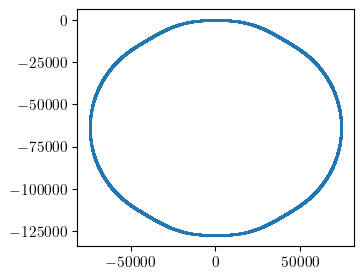

In [ ]:
nufact_nue.place_muons_on_lattice(lattice_3TeV)
nufact_numu.place_muons_on_lattice(lattice_3TeV)

plt.scatter(nufact_numu.pos['z'], nufact_numu.pos['y'], marker='.', s=0.5)
plt.gca().set_aspect('equal', adjustable='box')

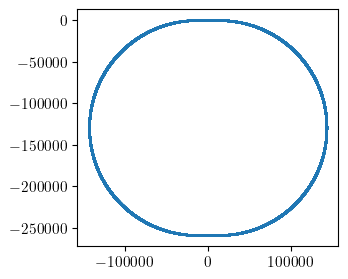

In [ ]:
nufact_nue.place_muons_on_lattice(lattice_10TeV)
nufact_numu.place_muons_on_lattice(lattice_10TeV)

plt.scatter(nufact_numu.pos['z'], nufact_numu.pos['y'], marker='.', s=0.5)
plt.gca().set_aspect('equal', adjustable='box')